In [ ]:
import pandas as pd


df = pd.read_csv('data123.csv')

dont_touch = ['one_max_pause_to_output_ratio', 'one_max_pause_count']
# Function to swap 'min' and 'max' in column names
def swap_min_max(column_name):
    if 'min' in column_name:
        return column_name.replace('min', 'max')
    elif 'max' in column_name:
        return column_name.replace('max', 'min')
    else:
        return column_name

# Renaming columns based on the condition
new_columns = [swap_min_max(col) for col in df.columns]

for i in range(len(new_columns)):
  if  dont_touch[0] in new_columns[i]:
    new_columns[i] = new_columns[i].replace('max', 'min')
  elif  dont_touch[1] in new_columns[i]:
    new_columns[i] = new_columns[i].replace('max', 'min')
  else: pass


df.columns = new_columns

df.to_csv('correct_column_names.csv')

In [ ]:
new_columns

['Unnamed: 0',
 'comma',
 'period',
 'dash',
 'qm',
 'ep',
 'sc',
 'colon',
 'revision_ratio',
 'total_actions',
 'one_min_pause_count',
 'one_min_pause_to_output_ratio',
 'ten_sec_pause_count',
 'ten_sec_pause_to_output_ratio',
 'comma_0_5',
 'period_0_5',
 'dash_0_5',
 'qm_0_5',
 'ep_0_5',
 'sc_0_5',
 'colon_0_5',
 'revision_ratio_0_5',
 'total_actions_0_5',
 'one_min_pause_count_0_5',
 'one_min_pause_to_output_ratio_0_5',
 'ten_sec_pause_count_0_5',
 'ten_sec_pause_to_output_ratio_0_5',
 'comma_5_10',
 'period_5_10',
 'dash_5_10',
 'qm_5_10',
 'ep_5_10',
 'sc_5_10',
 'colon_5_10',
 'revision_ratio_5_10',
 'total_actions_5_10',
 'one_min_pause_count_5_10',
 'one_min_pause_to_output_ratio_5_10',
 'ten_sec_pause_count_5_10',
 'ten_sec_pause_to_output_ratio_5_10',
 'comma_10_15',
 'period_10_15',
 'dash_10_15',
 'qm_10_15',
 'ep_10_15',
 'sc_10_15',
 'colon_10_15',
 'revision_ratio_10_15',
 'total_actions_10_15',
 'one_min_pause_count_10_15',
 'one_min_pause_to_output_ratio_10_15',
 'te

In [ ]:
section_dict = {}

suf = ['_0_5', '_5_10', '_10_15', '_15_20', '_20_25', '_25_30']

for s in suf:
  filtered_columns = [col for col in df.columns if s in col]
  filtered_columns.append('score')
  new_df = df[filtered_columns]
  section_dict[s] = new_df

In [ ]:
no_time = list(df.columns)

filtered_list_one = [word for word in no_time if not any(substring in word for substring in suf)]
filtered_list_one.remove('Unnamed: 0')
new_df= df[filtered_list_one]
section_dict['full'] = new_df

In [ ]:
no_time

['Unnamed: 0',
 'comma',
 'period',
 'dash',
 'qm',
 'ep',
 'sc',
 'colon',
 'revision_ratio',
 'total_actions',
 'one_min_pause_count',
 'one_min_pause_to_output_ratio',
 'ten_sec_pause_count',
 'ten_sec_pause_to_output_ratio',
 'comma_0_5',
 'period_0_5',
 'dash_0_5',
 'qm_0_5',
 'ep_0_5',
 'sc_0_5',
 'colon_0_5',
 'revision_ratio_0_5',
 'total_actions_0_5',
 'one_max_pause_count_0_5',
 'one_max_pause_to_output_ratio_0_5',
 'ten_sec_pause_count_0_5',
 'ten_sec_pause_to_output_ratio_0_5',
 'comma_5_10',
 'period_5_10',
 'dash_5_10',
 'qm_5_10',
 'ep_5_10',
 'sc_5_10',
 'colon_5_10',
 'revision_ratio_5_10',
 'total_actions_5_10',
 'one_max_pause_count_5_10',
 'one_max_pause_to_output_ratio_5_10',
 'ten_sec_pause_count_5_10',
 'ten_sec_pause_to_output_ratio_5_10',
 'comma_10_15',
 'period_10_15',
 'dash_10_15',
 'qm_10_15',
 'ep_10_15',
 'sc_10_15',
 'colon_10_15',
 'revision_ratio_10_15',
 'total_actions_10_15',
 'one_max_pause_count_10_15',
 'one_max_pause_to_output_ratio_10_15',
 'te

In [ ]:
for s in section_dict.keys():
  columns = list(section_dict[s].columns)
  for index in range(len(columns)):
    for su in suf:
      if su in columns[index]:
        columns[index] = columns[index].replace(su, '')
      else: pass
  section_dict[s].columns = columns




In [ ]:
result.index


Index(['_0_5', '_5_10', '_10_15', '_15_20', '_20_25', '_25_30', 'full'], dtype='object')

In [ ]:
def calculate_correlations(data_frames):
    correlations = {}
    for df_name, df in data_frames.items():
        score_column = df['score']  # Assuming 'Score' is the column to correlate with
        for column in df.columns:
            if column != 'score':
                if column not in correlations.keys():
                    correlations[column] = {}
                print(f'{df_name}_{column}')
                correlations[column][df_name] = df[column].corr(score_column)

    return pd.DataFrame(correlations)


result = calculate_correlations(section_dict)
result = result.drop('index', axis = 1)
result = result.T

result = result.round(3)
result.style.background_gradient(cmap="RdBu")


_0_5_comma
_0_5_period
_0_5_dash
_0_5_qm
_0_5_ep
_0_5_sc
_0_5_colon
_0_5_revision_ratio
_0_5_total_actions
_0_5_one_min_pause_count
_0_5_one_min_pause_to_output_ratio
_0_5_ten_sec_pause_count
_0_5_ten_sec_pause_to_output_ratio
_0_5_mean_word_len
_0_5_std_word_len
_0_5_mean_sentence_len
_0_5_std_sentence_len
_0_5_index
_0_5_min_word_count
_0_5_max_word_count
_0_5_median_word_count
_0_5_mean_word_count
_0_5_std_word_count
_0_5_skew_word_count
_0_5_min_action_time
_0_5_max_action_time
_0_5_median_action_time
_0_5_mean_action_time
_0_5_std_action_time
_0_5_skew_action_time
_0_5_min_inter_action_time
_0_5_max_inter_action_time
_0_5_median_inter_action_time
_0_5_mean_inter_action_time
_0_5_std_inter_action_time
_0_5_skew_inter_action_time
_0_5_action_occured
_5_10_comma
_5_10_period
_5_10_dash
_5_10_qm
_5_10_ep
_5_10_sc
_5_10_colon
_5_10_revision_ratio
_5_10_total_actions
_5_10_one_min_pause_count
_5_10_one_min_pause_to_output_ratio
_5_10_ten_sec_pause_count
_5_10_ten_sec_pause_to_output_rat

,_0_5,_5_10,_10_15,_15_20,_20_25,_25_30,full
comma,0.327000,0.327000,0.364000,0.329000,0.306000,0.208000,0.459000
period,-0.161000,-0.161000,-0.311000,-0.243000,-0.155000,-0.004000,-0.489000
dash,0.130000,0.130000,0.167000,0.200000,0.138000,0.078000,0.237000
qm,0.053000,0.053000,0.056000,0.045000,0.075000,0.082000,0.100000
ep,0.011000,0.011000,-0.004000,-0.005000,0.026000,0.002000,0.007000
sc,0.067000,0.067000,0.018000,0.033000,0.013000,0.020000,0.042000
colon,-0.034000,-0.034000,-0.022000,-0.013000,-0.030000,-0.010000,-0.038000
revision_ratio,0.070000,0.070000,0.027000,0.009000,0.013000,-0.067000,0.023000
total_actions,0.415000,0.415000,0.528000,0.508000,0.424000,0.202000,0.598000
one_min_pause_count,-0.172000,-0.172000,-0.192000,-0.137000,-0.104000,-0.010000,-0.172000


In [ ]:
result.to_csv('result.csv')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def _draw_as_table(df, pagesize):
    alternating_colors = [['white'] * len(df.columns), ['lightgray'] * len(df.columns)] * len(df)
    alternating_colors = alternating_colors[:len(df)]
    fig, ax = plt.subplots(figsize=pagesize)
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=df.values,
                        rowLabels=df.index,
                        colLabels=df.columns,
                        rowColours=['lightblue']*len(df),
                        colColours=['lightblue']*len(df.columns),
                        cellColours=alternating_colors,
                        loc='center',
                         cmap='RdBu')
    return fig


def dataframe_to_pdf(df, filename, numpages=(1, 1), pagesize=(11, 8.5)):
  with PdfPages(filename) as pdf:
    nh, nv = numpages
    rows_per_page = len(df) // nh
    cols_per_page = len(df.columns) // nv
    for i in range(0, nh):
        for j in range(0, nv):
            page = df.iloc[(i*rows_per_page):min((i+1)*rows_per_page, len(df)),
                           (j*cols_per_page):min((j+1)*cols_per_page, len(df.columns))]
            fig = _draw_as_table(page, pagesize)
            if nh > 1 or nv > 1:
                # Add a part/page number at bottom-center of page
                fig.text(0.5, 0.5/pagesize[0],
                         "Part-{}x{}: Page-{}".format(i+1, j+1, i*nv + j + 1),
                         ha='center', fontsize=8)
            pdf.savefig(fig, bbox_inches='tight')

            plt.close()



AttributeError: ignored

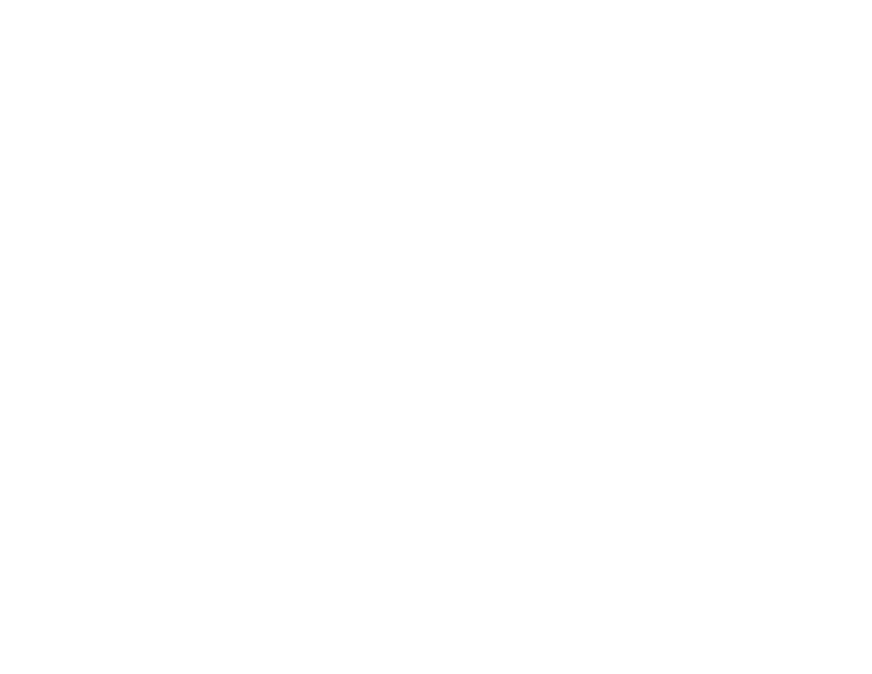

In [ ]:
dataframe_to_pdf(result, 'test_1.pdf')